In [1]:
import joblib
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Wholesale customers data.csv')

## Performing EDA

In [2]:
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
df.shape

(440, 8)

There are 440 instances and 8 attributes in Wholesale customers dataset.

In [5]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

There are no missing values in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


There are no null value in the dataset and all the columns have numeric datatype.

There are 6 continuous types of features in the dataset:
1. Fresh
2. Milk
3. Grocery
4. Frozen
5. Detergents_Paper
6. Delicassen


There are 2 categoricals features in the dataset:
1. Channel 
2. Region

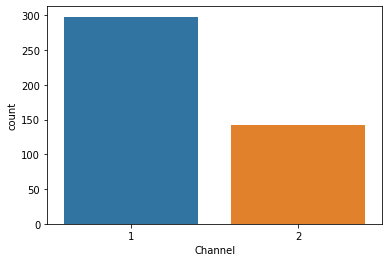

In [ ]:
# countplot to count categorical variable Channel
sns.countplot(x=df["Channel"])

Channel variable contains values as 1 and 2.

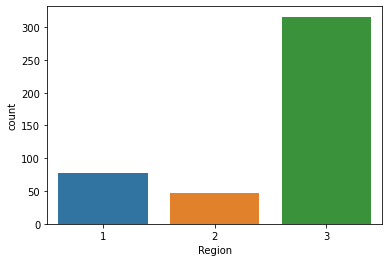

In [ ]:
# countplot to count categorical variable Region
sns.countplot(x=df["Region"])

Region column contains 3 unique values. 1,2 and 3.

Correlation analysis:

Text(0.5, 1.0, 'Correlation of features of Wholesale customers dataset')

<Figure size 432x288 with 0 Axes>

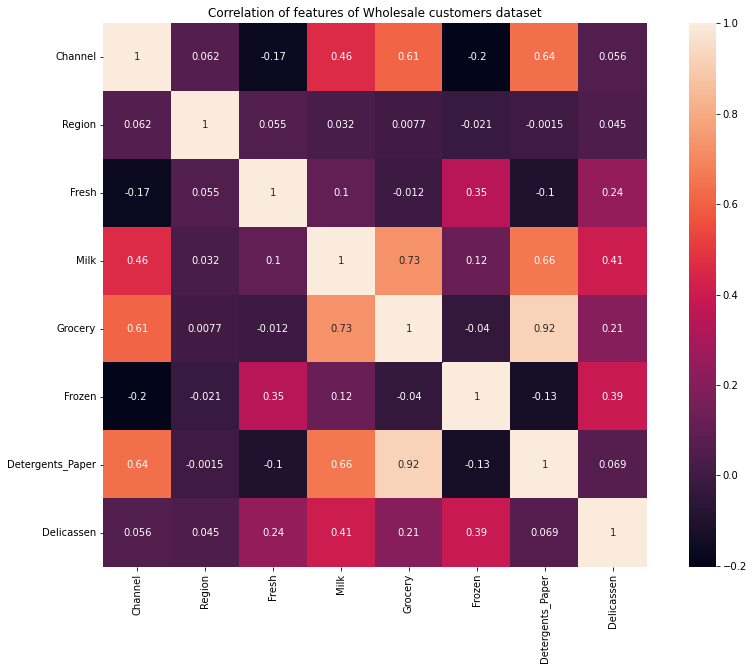

In [ ]:
plt.figure(1)
fig,ax= plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(df.corr(), square=True, annot=True)
plt.title('Correlation of features of Wholesale customers dataset')

## Conclusion:
Some features show some degree of correlation which are as below:

1. Grocery and Detergents_Paper are highly correlated = 0.92
2. Milk and Groceries = 0.73
3. Milk and Detergents_Paper = 0.66

## Feature Scaling to Normalize the data using StandardScaler

### StandardScaler

In [6]:
from sklearn.preprocessing import StandardScaler

scaled_values = StandardScaler().fit_transform(df)
df_scaler = pd.DataFrame(scaled_values, columns=df.columns)

In [7]:
df_scaler.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


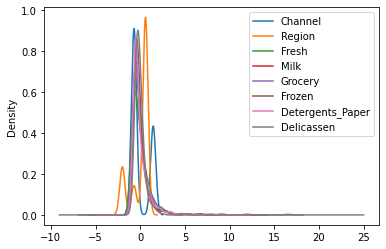

In [8]:
pd.DataFrame(df_scaler).plot(kind = 'kde')

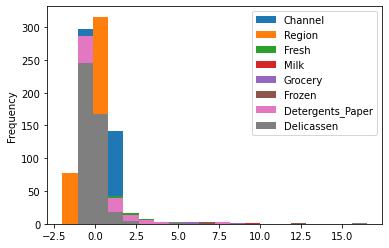

In [9]:
pd.DataFrame(df_scaler).plot(kind='hist', bins=20)

### Conclusion:
Standardscaler has scaled data with zero mean and one standard deviation. And Standardscaler shows centered curves with no outliers. Standardscaler is beneifitial when it comes to outlier.

## Finding optimal number of features using RFECV and showing the plot between Number of features selected vs Cross validation score (using channel as target variable).

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from yellowbrick.model_selection import RFECV
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X = df_scaler.drop(['Channel'], axis=1)
target = df['Channel']

In [ ]:
target[target == 2] = 0
target[target == 1] = 1

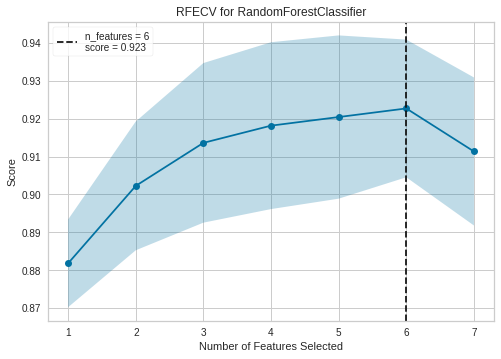

In [ ]:
rf = RandomForestClassifier()
rfecv = RFECV(estimator=rf)
rfecv.fit(X, target)
rfecv.show()

In [ ]:
rfecv_df = pd.DataFrame(rfecv.ranking_, index=X.columns, columns = ['Rank']).sort_values(by='Rank', ascending=True)
rfecv_df.head(7)

,Rank
Fresh,1
Milk,1
Grocery,1
Frozen,1
Detergents_Paper,1
Delicassen,1
Region,2


### Conclusion:

Fresh, Milk, Grocery, Frozen, Detergents_Paper and Delicassen are optimal features.

## Implementing KMeans Clustering for K=2 to K=15 and based on elbow method spot the optimum number of clusters.

In [ ]:
from sklearn.cluster import KMeans

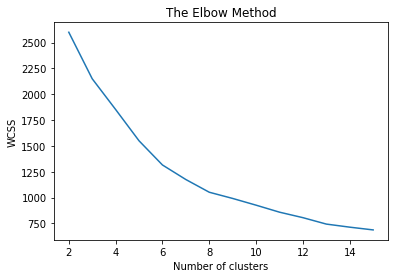

In [ ]:
# sum of squared distance between each point and the centroid in a cluster
wcss = []
for i in range(2, 16):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(df_scaler)
  # sum of squared distance between each point and the centroid in a cluster
  wcss.append(kmeans.inertia_)
  cluster_labels = kmeans.labels_


plt.plot(range(2, 16), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The elbow point comes at around 6 and this is the optimal number of clusters. After 6 when the number of clusters starts increasing the WCSS reduces slightly.

In [ ]:
kmeans = KMeans(n_clusters = 6, random_state = 42)
y_means = kmeans.fit(df_scaler)
y_means

KMeans(n_clusters=6, random_state=42)

In [ ]:
# counting the number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

0    179
1    125
4     87
3     38
5     10
2      1
dtype: int64

## Implementing PCA with number of original features to answer how much variance is explained by first 2 components and by first 4 components. Visualizing the clusters in the data.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=400, n_init=100, random_state=0)
y_means = kmeans.fit(df_scaler)

#### variance explained by first 2 components

In [ ]:
pca_2comp = PCA(n_components=2).fit(df_scaler)
pca2 = pca_2comp.transform(df_scaler)

In [ ]:
print("Explained variance = ", pca_2comp.explained_variance_)
print("Explained variance ratio = ", pca_2comp.explained_variance_ratio_)

Explained variance =  [3.10707136 1.79404441]
Explained variance ratio =  [0.38750123 0.22374588]


Here component 1 holds 38.75% of the information, component 2 holds 22.37%.

#### variance explained by first 4 components

In [ ]:
pca_4comp = PCA(n_components=4).fit(df_scaler)
pca4 = pca_4comp.transform(df_scaler)

In [ ]:
print("Explained variance = ", pca_4comp.explained_variance_)
print("Explained variance ratio = ", pca_4comp.explained_variance_ratio_)

Explained variance =  [3.10707136 1.79404441 1.0140786  0.74007428]
Explained variance ratio =  [0.38750123 0.22374588 0.12647173 0.09229904]


Here component 1 holds 38.75% of the information, component 2 holds 22.37%, 3 holds 12% and 4 holds 9% of the information.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


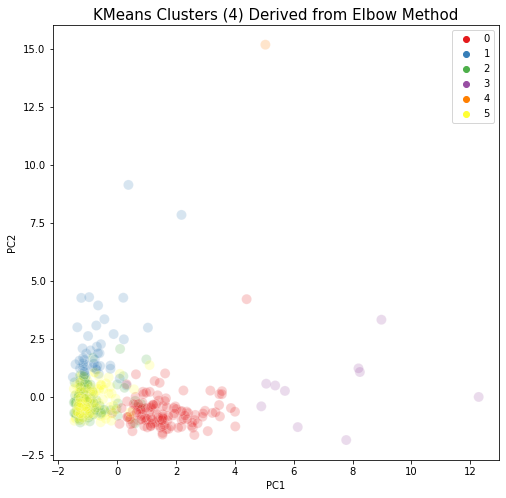

In [ ]:
plt.figure(figsize = (8, 8))
sns.scatterplot(pca4[:, 0], pca4[:, 1], 
                hue=y_means.labels_, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from Elbow Method', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

## Implementing XGBoost Classifier with 5 Fold CV and report the performance metrics.

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [12]:
X = df.drop('Channel', axis=1)
target = df['Channel']

In [13]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [21]:
# convert labels into binary values
target[target == 2] = 0
target[target == 1] = 1

In [22]:
model = XGBClassifier(eval_metric='mlogloss')
kfold = KFold(n_splits=5)

In [23]:
res = cross_val_score(model, X, target, cv=kfold)
prec = cross_val_score(model, X, target, cv=kfold, scoring='precision_weighted')
re = cross_val_score(model, X, target, cv=kfold, scoring='recall_weighted')

In [34]:
accuracy = round(res.mean()*100, 3)
precision = (round((prec.mean()*100), 3))
recall = (round((re.mean()*100), 3))
f1score = round(2 * ((recall * precision) / (recall + precision)), 3)

In [35]:
print("Accuracy = ", accuracy)
print("Recall = ", recall)
print("Precision = ", precision)
print("F1score = ", f1score)

Accuracy =  90.909
Recall =  90.909
Precision =  91.612
F1score =  91.259


Conclusion:

The model performed great. With Accuracy = "90.9", Recall = "90.9", Precision = "91.6" and F1score = "91.259".